# Project II Pipelines

In [1]:
## Libraries import section
import pandas as pd
import geopandas as gpd
import src.downloading_cleaning as cl
import src.scrapping as sc
import matplotlib.pyplot as plt

In [61]:
## re-load py files
import importlib
import src.scrapping as sc
importlib.reload(sc)

<module 'src.scrapping' from 'C:\\Users\\Sbort\\ironhack\\project-II-pipelines\\src\\scrapping.py'>

## Import database and initial cleaning
- Import Agoda.com hotel list
- Remove blank rows (if any)
- Remove duplicates (if any)
- Remove uncessary columns for this study

In [ ]:
agoda = cl.import_clean('./data/agoda.csv')

In [3]:
## Generating a subset of the columns that are going to be used after
agoda2 = agoda[["hotel_id", "hotel_name", "city", "country", "countryisocode", "longitude", "latitude", "continent_name"]]

In [4]:
agoda2 

,hotel_id,hotel_name,city,country,countryisocode,longitude,latitude,continent_name
0,1,Sai Kaew Beach Resort (SHA Plus+),Ko Samet,Thailand,TH,101.467007,12.568045,Asia
1,6,Marine Hotel,Dublin,Ireland,IE,-6.110340,53.388840,Europe
2,7,Pousada Vila do Mar,Buzios,Brazil,BR,-41.885799,-22.754910,South America
3,10,Malaga Alameda Centro Affiliated by Meliá,Málaga,Spain,ES,-4.432833,36.716057,Europe
4,13,NH Iquique Hotel (SHA Extra Plus),Iquique,Chile,CL,-70.129991,-20.269986,South America
...,...,...,...,...,...,...,...,...
642266,35575173,Pearl International,Kolkata,India,IN,88.362700,22.546343,Asia
642267,35582879,NOVA HOTEL OTOGAR,İstanbul,Turkey,TR,28.896189,41.037090,Europe
642268,35588130,Family Friendly 3 bedroom Suite @ Arte Plus Am...,Kuala Lumpur,Malaysia,MY,101.747529,3.161460,Asia
642269,35593358,Stelle Holiday Homes - Krish Villa,Lonavala,India,IN,73.399873,18.768859,Asia


# Comparing the Number of Hotels in Agoda and Booking
<ol>
    <li>Group Agoda hotel list by country</li>
    <li>Scrape Booking website to find the number of hotels in each country</li>
    <li>Check for errors in scrapping process</li>
    <li>Compare the two platforms</li>
</ol>

In [5]:
hotel_country = agoda2.groupby(['countryisocode'], as_index=False).agg(
    {"country": 'first', 'continent_name': 'first', 'hotel_id': 'count'}
)

In [6]:
hotel_country.rename(columns={'hotel_id': 'agoda_num'}, inplace=True, errors='raise')

In [7]:
hotel_country['booking_num'] = hotel_country.countryisocode.apply(sc.booking_country)

No hotels found in American Samoa
No hotels found in Isle of Man


### Total Number of hotels


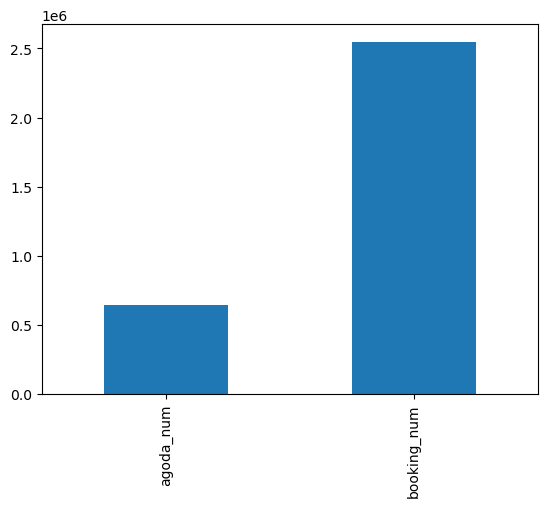

In [8]:
hotel_country[['agoda_num','booking_num']].sum().plot.bar()
plt.show()

<AxesSubplot:xlabel='continent_name'>

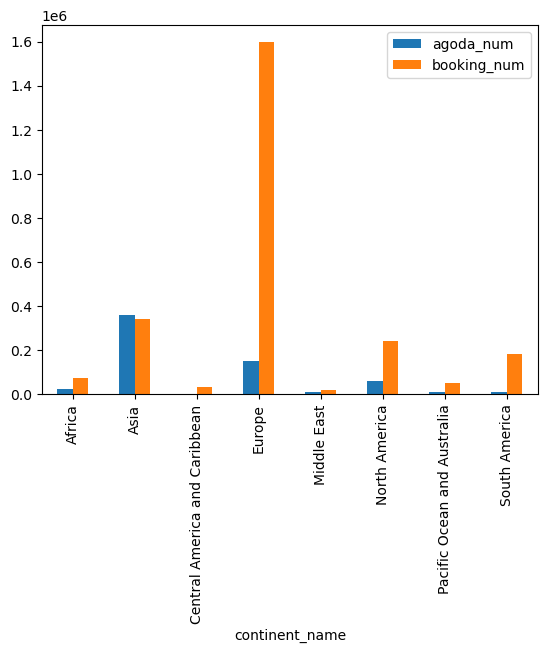

In [9]:
hotel_country.groupby("continent_name")[['agoda_num','booking_num']].sum().plot.bar()

In [10]:
hotel_country.sort_values(by='agoda_num', ascending=False)

,countryisocode,country,continent_name,agoda_num,booking_num
43,CN,China,Asia,107806,32303
200,US,United States,North America,53235,192033
94,IN,India,Asia,45359,72577
90,ID,Indonesia,Asia,41657,36242
189,TH,Thailand,Asia,32744,35742
...,...,...,...,...,...
64,FM,Federated States of Micronesia,Pacific Ocean and Australia,2,9
211,YE,Yemen,Middle East,1,0
149,NU,Niue,Pacific Ocean and Australia,1,10
9,AS,American Samoa,Pacific Ocean and Australia,1,0


In [62]:
taiwan = sc.cities_country(agoda2, "Taiwan")

No hotels found in Kinmen Islands
No hotels found in Liuqiu
No hotels found in Matsu Island
No hotels found in Penghu


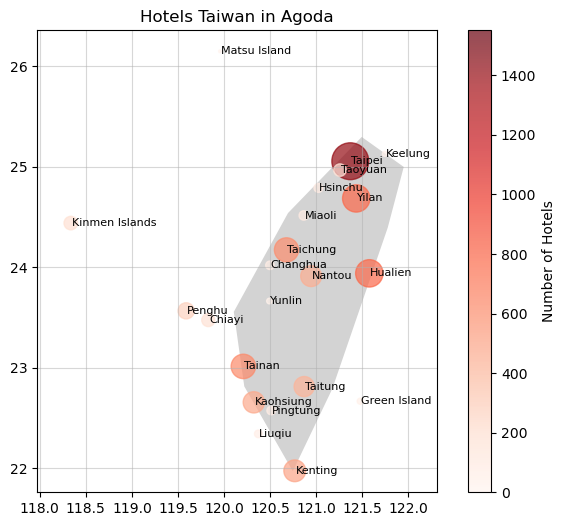

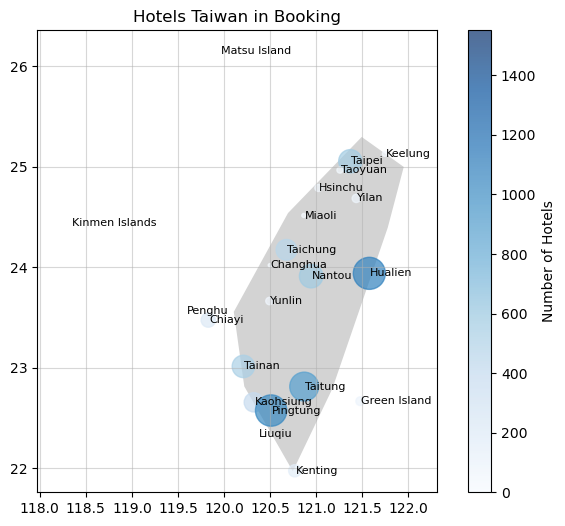

In [63]:
taiwan_agoda = sc.country_plot(taiwan, "Taiwan", "agoda")
taiwan_agoda = sc.country_plot(taiwan, "Taiwan", "booking")

In [64]:
thailand = sc.cities_country(agoda2, "Thailand")

No hotels found in Chai Prakan
No hotels found in Kanthararom
No hotels found in Kaset Sombun
No hotels found in Kaset Wisai
No hotels found in Khao Chamao
No hotels found in Koh Kood
No hotels found in Koh Sriboya
No hotels found in Lahan Sai
No hotels found in Na Muen
No hotels found in Nong Hong
No hotels found in Pakham
No hotels found in Phan
No hotels found in Phanna Nikhom
No hotels found in Phop Phra
No hotels found in Prathai
No hotels found in Si Thep
No hotels found in Song Hong
No hotels found in Takhli
No hotels found in Wiang Kaen


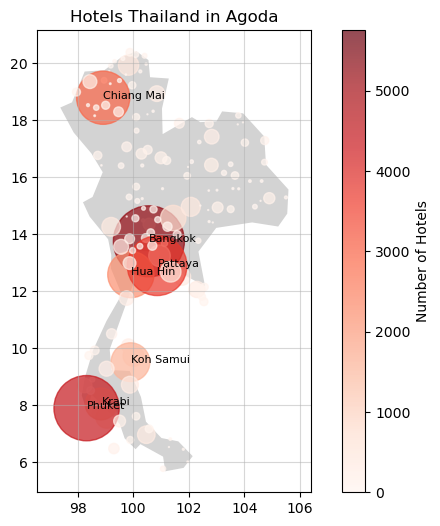

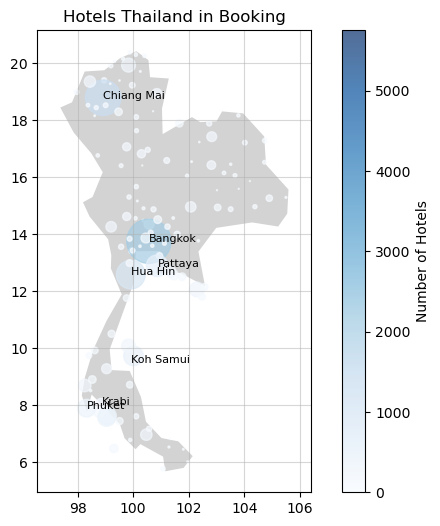

In [65]:
thailand_agoda = sc.country_plot(thailand, "Thailand", "agoda", names="top")
thailand_booking = sc.country_plot(thailand, "Thailand", "booking", names="top")

In [66]:
china = sc.cities_country(agoda2, "China")

No hotels found in Bayan Nur
No hotels found in Bayingol
No hotels found in Bortala
No hotels found in Chongzuo
No hotels found in Cushahuan
No hotels found in Da Hinggan Ling
No hotels found in Dehong
No hotels found in Gannan
No hotels found in Ganzi
No hotels found in Haibei
No hotels found in Haidong
No hotels found in Hainan
No hotels found in Haixi
No hotels found in Hinggan
No hotels found in Hotan
No hotels found in Ili
No hotels found in Kizilsu
No hotels found in Liangshan Yi
No hotels found in Liupanshui
No hotels found in Mount Emei
No hotels found in Ngari Diqu
No hotels found in Nujiang
No hotels found in Nyingchi
No hotels found in Qiandao Lake
No hotels found in Qiandongnan
No hotels found in Qiannan
No hotels found in Qianxinan
No hotels found in Qiongzhong Li and Miao
No hotels found in Shangrao Xian
No hotels found in Shannan
No hotels found in Shennongjia Linqu
No hotels found in Xilin Gol
No hotels found in Ziyang


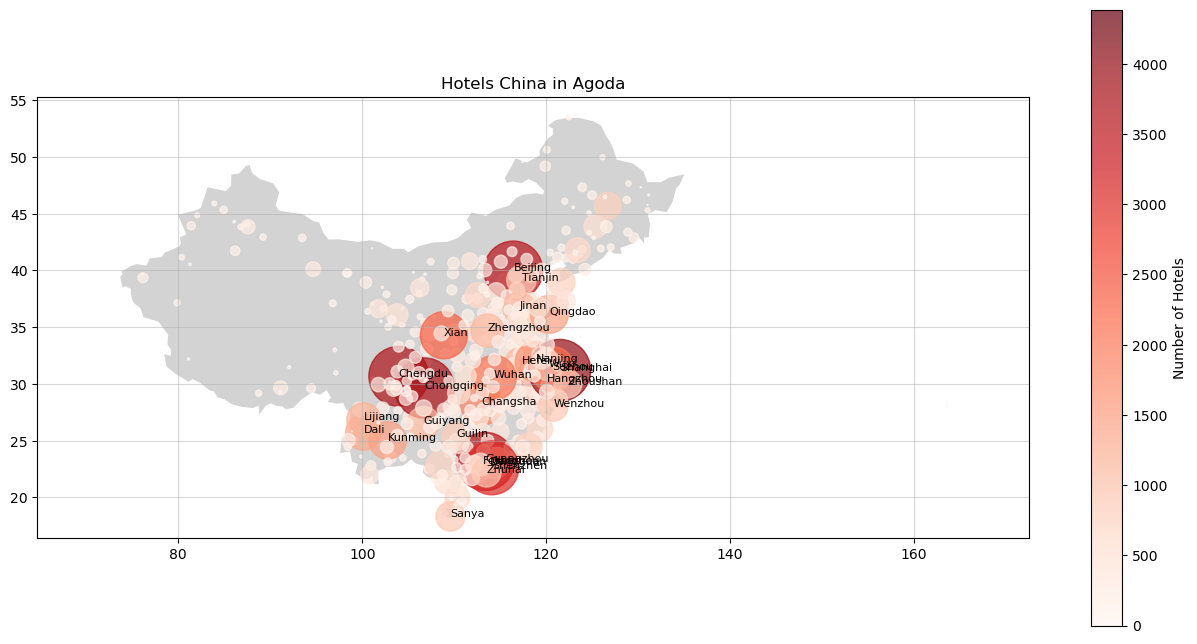

In [75]:
china_agoda = sc.country_plot(china, "China", "agoda", names="top", fh=8, fl=16)


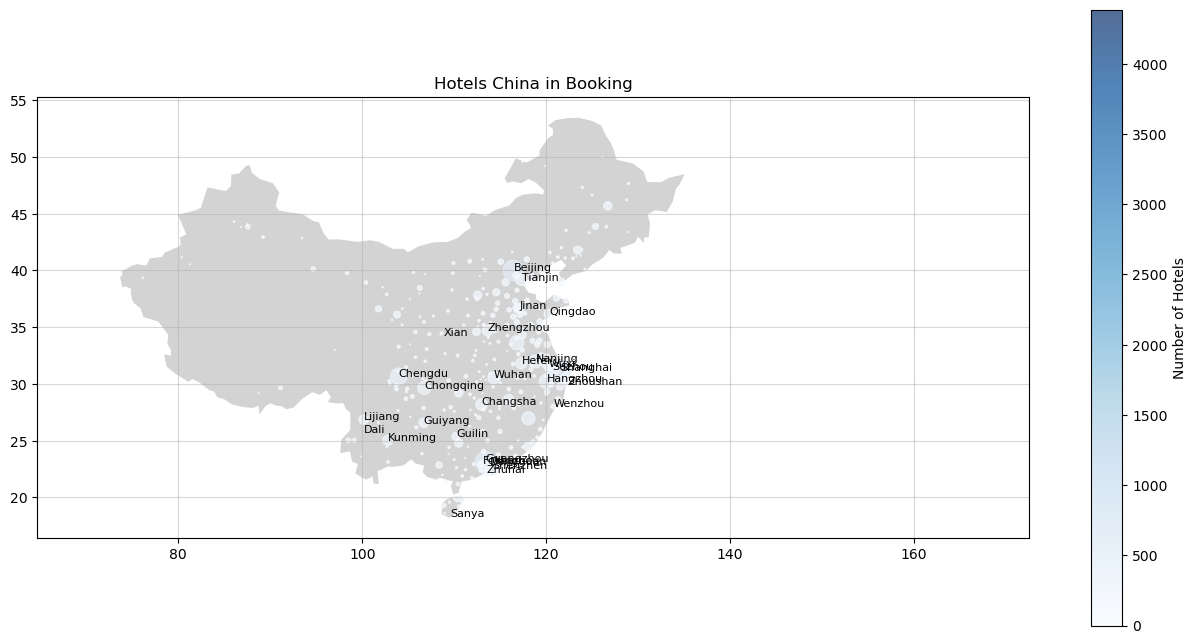

In [74]:
china_booking = sc.country_plot(china, "China", "booking", names="top", fh=8, fl=16)

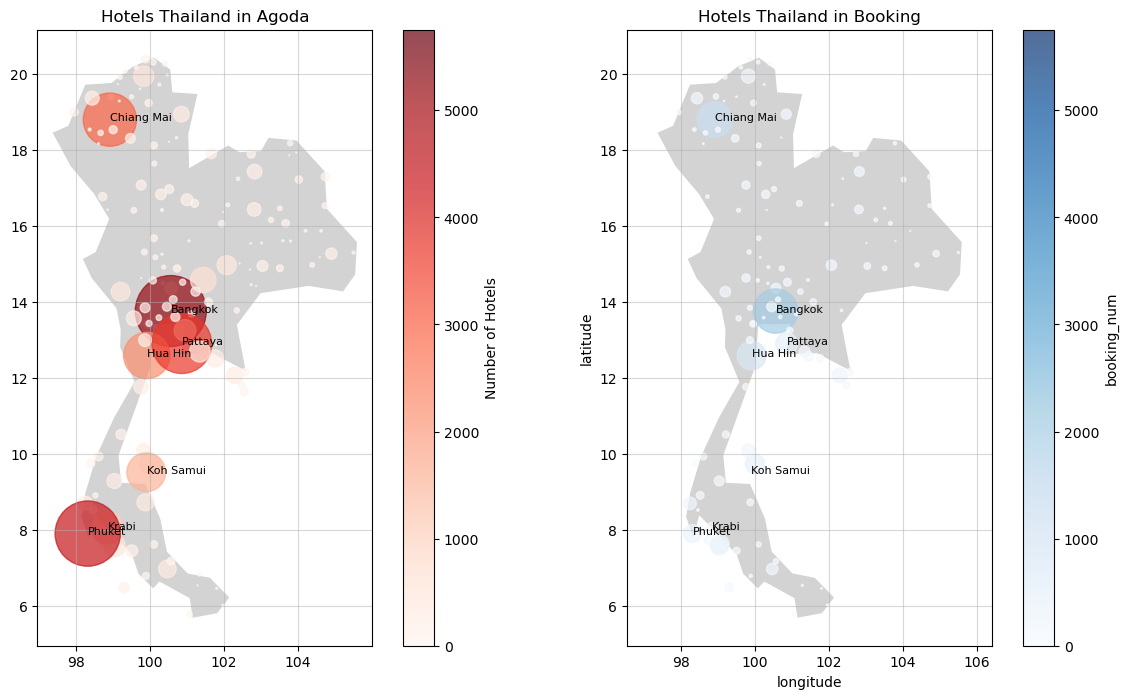

In [105]:
    # initialize axis
    fig, axs = plt.subplots(1, 2, figsize=(16,8))
    # plot map on axis
    countries = gpd.read_file(  
         gpd.datasets.get_path("naturalearth_lowres"))
    countries[countries["name"] == "Thailand"].plot(color="lightgrey", ax=axs[0])
    # plot points
    thailand.plot(x="longitude", y="latitude", kind="scatter", 
            c="agoda_num", s=thailand["agoda_num"]/2, colormap="Reds", vmax=thailand.agoda_num.max()*1.1, vmin=0, alpha=0.7,
            title=f"Hotels Thailand in Agoda", 
            ax=axs[0])
    # adding names of the cities
    top = thailand.agoda_num.max()/5
    for i in range(thailand.shape[0]):
        if thailand.agoda_num[i] > top:
            axs[0].text(x=thailand.longitude[i]+0.01, y=thailand.latitude[i]-0.03,s=thailand.city[i], fontdict=dict(size=8))
            axs[1].text(x=thailand.longitude[i]+0.01, y=thailand.latitude[i]-0.03,s=thailand.city[i], fontdict=dict(size=8))
    #Removing X and Y labels
    axs[0].set_xlabel("")
    axs[0].set_ylabel("")
    axs[1].set_xlabel("")
    axs[1].set_ylabel("")
    #adding padding
    plt.margins(0.1, 0.05)
    axs[0].collections[-1].colorbar.set_label("Number of Hotels")
    # adding grid
    axs[0].grid(visible=True, alpha=0.5)
    countries = gpd.read_file(  
         gpd.datasets.get_path("naturalearth_lowres"))
    countries[countries["name"] == "Thailand"].plot(color="lightgrey", ax=axs[1])
    thailand.plot(x="longitude", y="latitude", kind="scatter", 
            c="booking_num", s=thailand["booking_num"]/2, colormap="Blues", vmax=thailand.agoda_num.max()*1.1, vmin=0, alpha=0.7,
            title=f"Hotels Thailand in Booking", 
            ax=axs[1])
    axs[1].grid(visible=True, alpha=0.5)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()